In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [140]:
url ="http://bit.ly/w-data"
df = pd.read_csv(url)

In [141]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [143]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [144]:
df.shape

(25, 2)

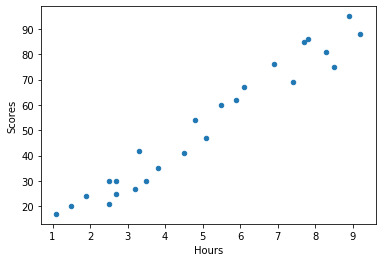

In [145]:
df.plot(kind="scatter",x="Hours",y="Scores")
plt.show()

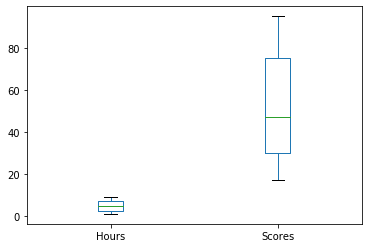

In [146]:
df.plot(kind='box')
plt.show()

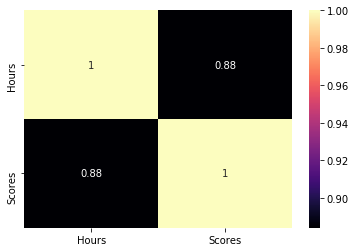

In [147]:
relation = df.corr(method ='kendall')
sns.heatmap(relation, annot=True, cmap='magma')
plt.show()

In [148]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [149]:
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y, test_size =0.2,random_state = 0)

In [185]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [186]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [187]:
#Training the model

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
regressor=LinearRegression()

In [190]:
regressor.fit(X_train,y_train)

LinearRegression()

In [156]:
m = regressor.coef_

In [157]:
m

array([9.91065648])

In [158]:
c = regressor.intercept_

In [159]:
c

2.018160041434683

In [160]:
#let y=line,m=regressor.coef_*X+regressor.intercept_

In [161]:
line=m*X+c

In [162]:
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

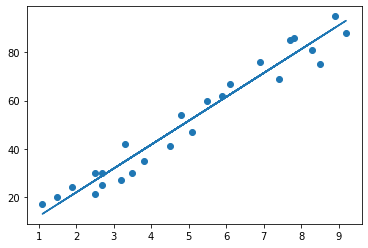

In [163]:
# Plotting for the train data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [164]:
#For testing

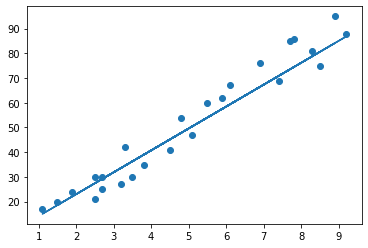

In [191]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [192]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [193]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [194]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [195]:
#predicting the score if studied for 9.5 hours

In [196]:
regressor.predict([[9.25]])

array([93.69173249])

In [ ]:
#predicted final score when studied for 9.25 hours is 93.7 marks